# Colouring matrices

In [107]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sys
import sympy
import math
from sympy import *
from sympy.abc import x, n, z, t, k
from sympy.core.cache import *
    
clear_cache()    
    
init_printing(use_latex='mathjax') # for nice printing, a-la' TeX

sys.setrecursionlimit(100000)

plt.rcParams['figure.figsize'] = (10.0, 10.0)

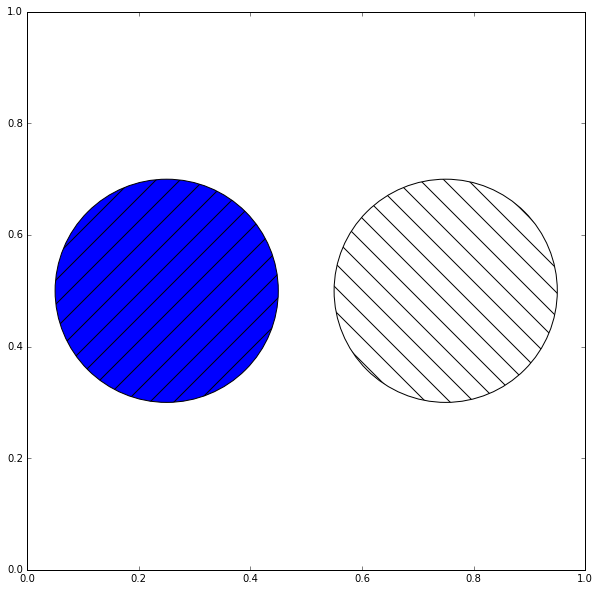

In [108]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, aspect='equal')
for p in [
    patches.Circle(
        (0.25, 0.5), 0.2,
        hatch='/'
    ),
    patches.Circle(
        (0.75, 0.5), 0.2,
        hatch='\\',
        fill=False
    ),
]:
    ax3.add_patch(p)
fig3.savefig('circle3.svg', dpi=90, bbox_inches='tight')

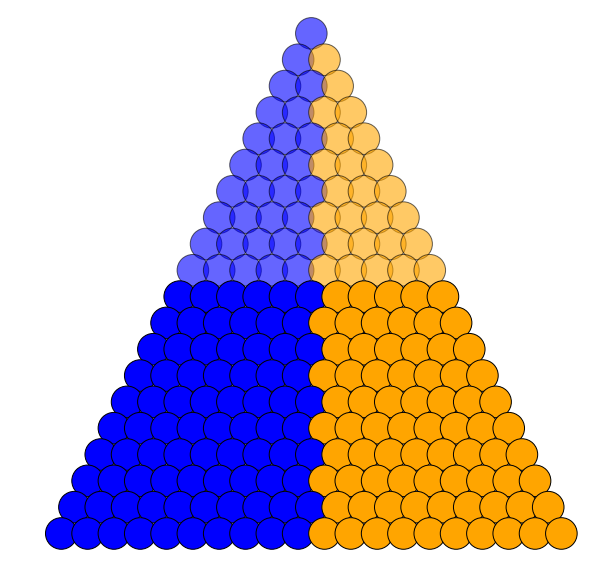

In [139]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, aspect='equal')

radius = .6
rows = 20
coordinates = []

for r in range(rows):
    for c in range(r+1):
        coordinates.append((-r/2+c, -r))
        #coordinates.append((c, -r))
        
        
for co in coordinates:
    c, r = co
    color = "orange" if c > 0 is 0 else "blue"
    a = .6 if r > -rows/2 else 1
    circle = patches.Circle(co, radius, facecolor=color, alpha=a, fill=True) 
    #circle.set_label(str(r))
                            #joinstyle='miter',fill=False,hatch='*')
    #if c is -3: circle.set_visible(False)
    ax3.add_patch(circle)
    
ax3.set_xlim(-((rows+2*radius)/2),(rows+2*radius)/2)
ax3.set_ylim(-rows,1)
#ax3.set_autoscale_on(True)
ax3.set_axis_off()
fig3.savefig('circles.svg', dpi=600)#, bbox_inches='tight')